In [1]:
import os
import pandas as pd
from dataset_path import output_path
from sklearn.model_selection import cross_val_score
import os
from thesis_helper import * 
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from numpy import mean
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import std

pd.set_option('float_format', '{:.3f}'.format)
path = output_path

output_path = os.path.join(path, "Figure3")
if not os.path.exists(output_path):
    os.makedirs(output_path)
df_train = pd.read_csv((os.path.join(path, 'train.csv')))
df_test = pd.read_csv((os.path.join(path, 'test.csv')))
confidence_interval = 95
random_seed = 0
result_list = []


In [2]:
X_train,y_train,X_test,y_test = preprocessing(path,df_train,df_test)

Before filtering: training size = 334480 , testing size = 83620
After filtering: training size = 176213 , testing size = 44063


In [24]:
steps = [('pca', PCA(n_components=1)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.952 (0.000)


>1 0.95251 (0.000)
>2 0.95256 (0.000)
>3 0.95265 (0.000)
>4 0.95256 (0.000)
>5 0.95256 (0.000)
>6 0.95256 (0.000)
>7 0.95257 (0.000)
>8 0.95260 (0.000)
>9 0.95261 (0.000)
>10 0.95259 (0.000)
>11 0.95258 (0.000)
>12 0.95260 (0.000)
>13 0.95258 (0.000)
>14 0.95261 (0.000)
>15 0.95263 (0.000)
>16 0.95263 (0.000)
>17 0.95263 (0.000)
>18 0.95262 (0.000)
>19 0.95261 (0.000)
>20 0.95260 (0.000)
>21 0.95262 (0.000)
>22 0.95259 (0.000)
>23 0.95260 (0.000)
>24 0.95262 (0.000)
>25 0.95260 (0.000)
>26 0.95259 (0.000)
>27 0.95258 (0.000)
>28 0.95259 (0.000)
>29 0.95259 (0.000)
>30 0.95260 (0.000)
>31 0.95260 (0.000)
>32 0.95260 (0.000)
>33 0.95260 (0.000)
>34 0.95260 (0.000)
>35 0.95258 (0.000)
>36 0.95259 (0.000)
>37 0.95260 (0.000)
>38 0.95256 (0.000)
>39 0.95256 (0.000)
>40 0.95257 (0.000)
>41 0.95255 (0.000)
>42 0.95255 (0.000)
>43 0.95258 (0.000)
>44 0.95257 (0.000)
>45 0.95259 (0.000)
>46 0.95256 (0.000)
>47 0.95256 (0.000)
>48 0.95258 (0.000)
>49 0.95259 (0.000)
>50 0.95257 (0.000)
>51 0.952

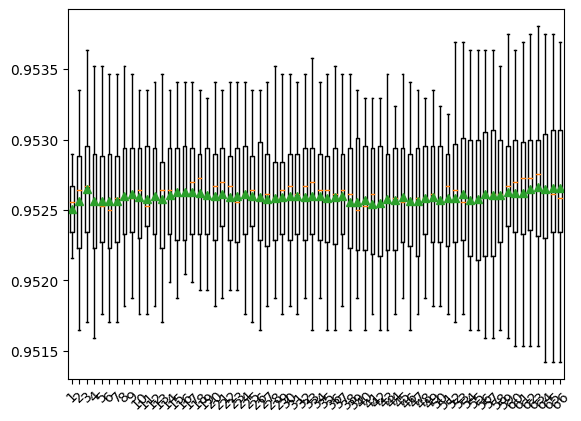

In [26]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.preprocessing import scale

scaled_X_train = scale(X_train)
def get_models():
    models = dict()
    for i in range(1,67):
        steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, scaled_X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.5f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

In [32]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.preprocessing import scale

scaled_X_train = scale(X_train)
def get_models():
    models = dict()
    for i in range(1,67):
        steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, scaled_X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.5f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

[array([0.95261605, 0.95238906, 0.95261605, 0.95232961, 0.95215936,
        0.95272686, 0.95261336, 0.95244311, 0.95267011, 0.95255661,
        0.95227556, 0.95227556, 0.9526728 , 0.95215936, 0.95255661,
        0.95267011, 0.95244311, 0.95289711, 0.95278361, 0.95232961,
        0.95233231, 0.95221882, 0.95261605, 0.95244311, 0.95267011,
        0.95244311, 0.95272686, 0.95255661, 0.95244311, 0.95267011]),
 array([0.95289978, 0.95199183, 0.9525593 , 0.95267011, 0.95289711,
        0.95249986, 0.95284036, 0.9516486 , 0.95312411, 0.95221611,
        0.95165134, 0.95204858, 0.95295653, 0.95238636, 0.95215936,
        0.95295386, 0.95272686, 0.95335112, 0.95329436, 0.95227286,
        0.95284304, 0.95204858, 0.9526728 , 0.95244311, 0.95278361,
        0.95215936, 0.95301061, 0.95244311, 0.95261336, 0.95278361]),
 array([0.95301328, 0.95170809, 0.95272954, 0.95278361, 0.95306736,
        0.95255661, 0.95312411, 0.9517621 , 0.95340787, 0.95232961,
        0.95170809, 0.95210532, 0.95289978, 